In [9]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec 
#Chi-square test
from scipy.stats import chi2_contingency

In [10]:
#sklearn
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import tree


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [11]:
#For Time series Analyis
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
os.chdir("C:/Users/hp/Desktop/project2")

In [13]:
df = pd.read_excel("Absenteeism_at_work_Project.xls")

In [14]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [15]:
df.loc[0:112, 'Year'] = 2007
df.loc[113:358, 'Year'] = 2008
df.loc[359:570, 'Year'] = 2009
df.loc[571:740, 'Year'] = 2010

In [16]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Year
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0,2007.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0,2007.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0,2007.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0,2007.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0,2007.0


In [17]:
df.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Year
735,11,14.0,7.0,3,1,289.0,36.0,13.0,33.0,264604.0,...,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0,2010.0
736,1,11.0,7.0,3,1,235.0,11.0,14.0,37.0,264604.0,...,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0,2010.0
737,4,0.0,0.0,3,1,118.0,14.0,13.0,40.0,271219.0,...,1.0,1.0,1.0,0.0,8.0,98.0,170.0,34.0,0.0,2010.0
738,8,0.0,0.0,4,2,231.0,35.0,14.0,39.0,271219.0,...,1.0,2.0,1.0,0.0,2.0,100.0,170.0,35.0,0.0,2010.0
739,35,0.0,0.0,6,3,179.0,45.0,14.0,53.0,271219.0,...,1.0,1.0,0.0,0.0,1.0,77.0,175.0,25.0,0.0,2010.0


In [18]:
df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
Year                               float64
dtype: object

In [19]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(' , ' ').str.replace(')', '')

In [20]:
df.dtypes

id                                   int64
reason_for_absence                 float64
month_of_absence                   float64
day_of_the_week                      int64
seasons                              int64
transportation_expense             float64
distance_from_residence_to_work    float64
service_time                       float64
age                                float64
work_load_average/day              float64
hit_target                         float64
disciplinary_failure               float64
education                          float64
son                                float64
social_drinker                     float64
social_smoker                      float64
pet                                float64
weight                             float64
height                             float64
body_mass_index                    float64
absenteeism_time_in_hours          float64
year                               float64
dtype: object

In [21]:
missing_val = pd.DataFrame(df.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Miising_perc.xlsx", index = False)

In [22]:
missing_val

,Variables,Missing_percentage
0,body_mass_index,4.189189
1,absenteeism_time_in_hours,2.972973
2,height,1.891892
3,work_load_average/day,1.351351
4,education,1.351351
5,transportation_expense,0.945946
6,son,0.810811
7,hit_target,0.810811
8,disciplinary_failure,0.810811
9,social_smoker,0.540541


In [23]:
df['reason_for_absence'] = df['reason_for_absence'].fillna(df['reason_for_absence'].median())
df['month_of_absence'] = df['month_of_absence'].fillna(df['month_of_absence'].median())
df['transportation_expense'] = df['transportation_expense'].fillna(df['transportation_expense'].median())
df['distance_from_residence_to_work'] = df['distance_from_residence_to_work'].fillna(df['distance_from_residence_to_work'].median())
df['service_time'] = df['service_time'].fillna(df['service_time'].median())
df['age'] = df['age'].fillna(df['age'].median())
df['work_load_average/day'] = df['work_load_average/day'].fillna(df['work_load_average/day'].median())
df['hit_target'] = df['hit_target'].fillna(df['hit_target'].median())
df['disciplinary_failure'] = df['disciplinary_failure'].fillna(df['disciplinary_failure'].median())
df['education'] = df['education'].fillna(df['education'].median())
df['son'] = df['son'].fillna(df['son'].median())
df['social_drinker'] = df['social_drinker'].fillna(df['social_drinker'].median())
df['social_smoker'] = df['social_smoker'].fillna(df['social_smoker'].median())
df['pet'] = df['pet'].fillna(df['pet'].median())
df['weight'] = df['weight'].fillna(df['weight'].median())
df['height'] = df['height'].fillna(df['height'].median())
df['body_mass_index'] = df['body_mass_index'].fillna(df['body_mass_index'].median())
df['absenteeism_time_in_hours'] = df['absenteeism_time_in_hours'].fillna(df['absenteeism_time_in_hours'].median())

In [24]:
df.isnull().sum()

id                                 0
reason_for_absence                 0
month_of_absence                   0
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average/day              0
hit_target                         0
disciplinary_failure               0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
year                               0
dtype: int64

In [25]:
#Converting all the variables into integer as factor variables are affected after Knn inputation
cnames = df.columns.tolist()
df[cnames] = df[cnames].apply(lambda x: round(x))

In [26]:
df.describe()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,year
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.204054,6.318919,3.914865,2.544595,221.072973,29.652703,12.567568,36.451351,271095.078378,...,1.291892,1.017568,0.568919,0.072973,0.744595,79.068919,172.112162,26.613514,6.859459,2008.590541
std,11.021247,8.423836,3.433642,1.421675,1.111831,66.637428,14.819790,4.380981,6.467076,38725.536742,...,0.673238,1.090475,0.495562,0.260268,1.318510,12.860734,6.030335,4.215357,13.292045,1.002658
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000,2007.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000,2008.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000,2009.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000,2009.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000,2010.000000


In [27]:
cat_names = ['reason_for_absence', 'month_of_absence', 'day_of_the_week', 'seasons', 'disciplinary_failure',
                      'education', 'son', 'social_drinker', 'social_smoker', 'pet', 'id']

In [28]:
df[cat_names] = df[cat_names].apply(pd.Series.astype, dtype = 'category')

In [29]:
cnames_all = df.columns

In [30]:
cnames_all

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours', 'year'],
      dtype='object')

In [31]:
#removing the last three rows
df = df.loc[0:736,]
df.tail()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,year
732,10,22.0,7.0,4,1,361.0,52.0,3.0,28.0,264604.0,...,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0,2010.0
733,28,22.0,7.0,4,1,225.0,26.0,9.0,28.0,264604.0,...,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,8.0,2010.0
734,13,13.0,7.0,2,1,369.0,17.0,12.0,31.0,264604.0,...,1.0,3.0,1.0,0.0,0.0,70.0,169.0,25.0,80.0,2010.0
735,11,14.0,7.0,3,1,289.0,36.0,13.0,33.0,264604.0,...,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0,2010.0
736,1,11.0,7.0,3,1,235.0,11.0,14.0,37.0,264604.0,...,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0,2010.0


In [32]:
#No of person without any absent hours
ab = df['absenteeism_time_in_hours'].loc[(df['absenteeism_time_in_hours'] == 0)]

In [33]:
ab.count()

33

In [34]:
ab.min()

0.0

In [35]:
#Sum of total absenteeism time
total_absent_hrs = df['absenteeism_time_in_hours'].sum()
#Average service time of employees
average_service_time = df['service_time'].mean()
#Total man days lost
total_man_days = total_absent_hrs/average_service_time

In [36]:
total_absent_hrs

5076.0

In [37]:
average_service_time

12.563093622795115

In [38]:
total_man_days

404.0406091370558

In [39]:
num_var = ['transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target','weight', 'height', 'body_mass_index',
        'absenteeism_time_in_hours', 'year']

In [40]:
df[num_var]= df[num_var].apply(pd.Series.astype, dtype = 'int')

In [41]:
df[num_var].head()

,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,hit_target,weight,height,body_mass_index,absenteeism_time_in_hours,year
0,289,36,13,33,239554,97,90,172,30,4,2007
1,118,13,18,50,239554,97,98,178,31,0,2007
2,179,51,18,38,239554,97,89,170,31,2,2007
3,279,5,14,39,239554,97,68,168,24,4,2007
4,289,36,13,33,239554,97,90,172,30,2,2007


In [42]:
# #Detect and delete outliers from data
for i in num_var:
     print(i)
     q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
     iqr = q75 - q25

     min = q25 - (iqr*1.5)
     max = q75 + (iqr*1.5)
     print(min)
     print(max)
    
     df = df.drop(df[df.loc[:,i] < min].index)
     df = df.drop(df[df.loc[:,i] > max].index)

transportation_expense
57.5
381.5
distance_from_residence_to_work
-35.0
101.0
service_time
-1.5
26.5
age
17.5
53.5
work_load_average/day
183688.0
345552.0
hit_target
86.625
103.625
weight
39.0
119.0
height
164.5
176.5
body_mass_index
15.0
39.0
absenteeism_time_in_hours
-7.0
17.0
year
2006.5
2010.5


In [43]:
df.isnull().sum()

id                                 0
reason_for_absence                 0
month_of_absence                   0
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average/day              0
hit_target                         0
disciplinary_failure               0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
year                               0
dtype: int64

<Figure size 720x720 with 0 Axes>

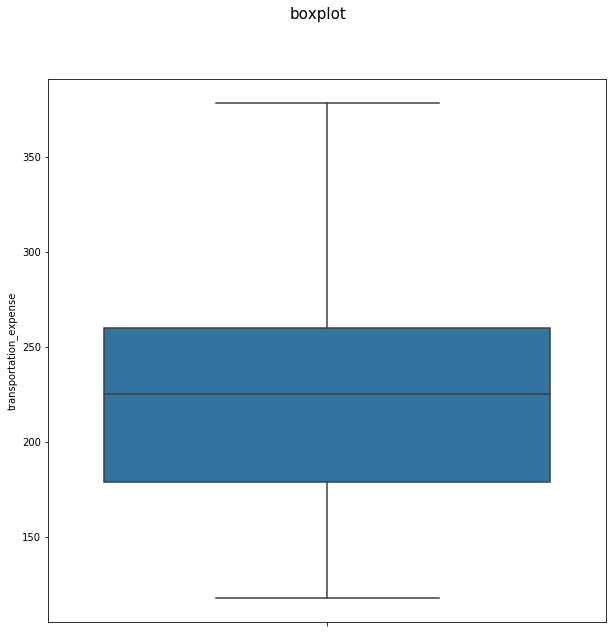

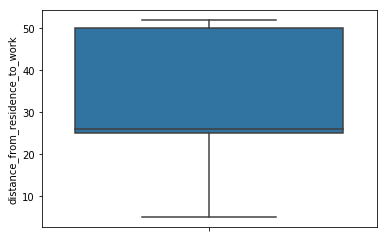

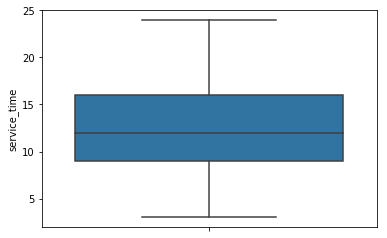

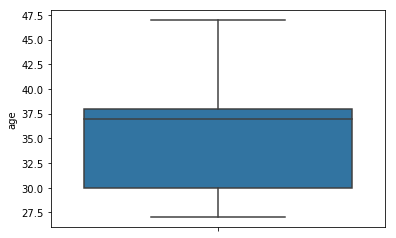

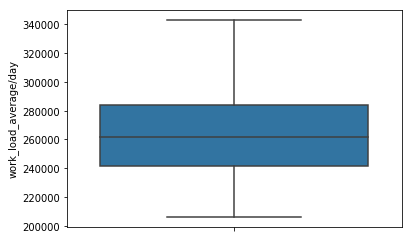

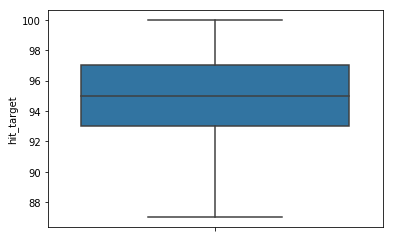

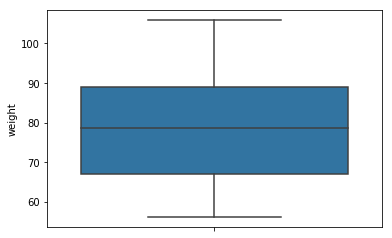

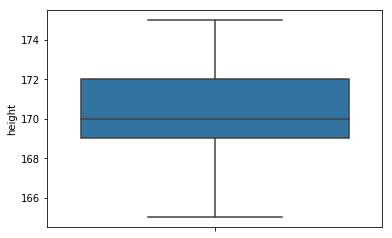

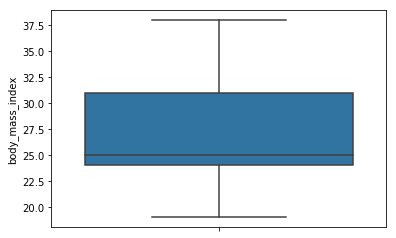

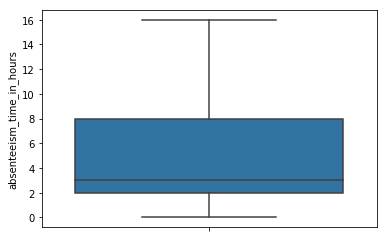

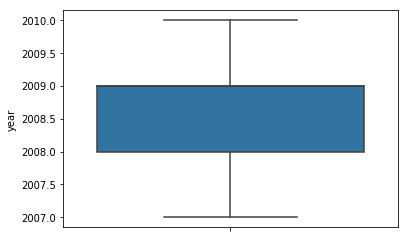

In [44]:
plt.figure(figsize=(10,10))
plt.figure(figsize=(10,10))
plt.suptitle("boxplot",fontsize=15)
for i in num_var :
    sns.boxplot(
    y = df[i],
    data=df)
    plt.show()

In [45]:
##Correlation analysis
#Correlation plot
df_corr = df.loc[:,cnames_all]

In [46]:
df_corr.tail()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,year
731,34,23.0,7.0,4,1,118,10,10,37,264604,...,1.0,0.0,0.0,0.0,0.0,83,172,28,2,2010
732,10,22.0,7.0,4,1,361,52,3,28,264604,...,1.0,1.0,1.0,0.0,4.0,80,172,27,8,2010
733,28,22.0,7.0,4,1,225,26,9,28,264604,...,1.0,1.0,0.0,0.0,2.0,69,169,24,8,2010
735,11,14.0,7.0,3,1,289,36,13,33,264604,...,1.0,2.0,1.0,0.0,1.0,90,172,30,8,2010
736,1,11.0,7.0,3,1,235,11,14,37,264604,...,3.0,1.0,0.0,0.0,1.0,88,172,29,4,2010


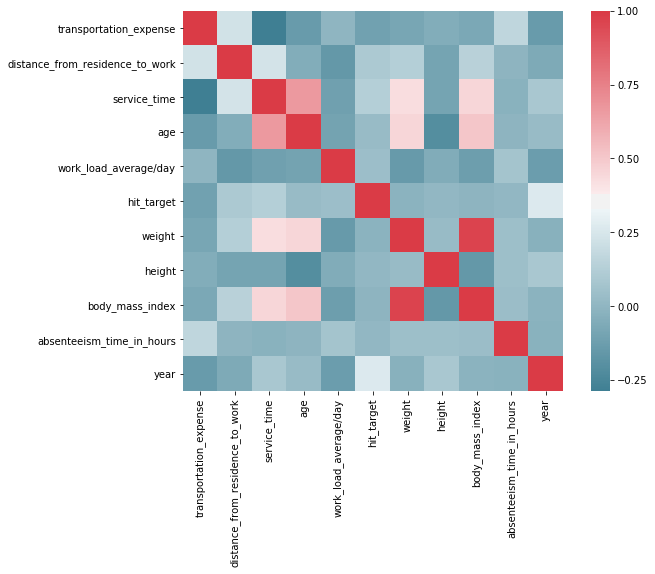

In [47]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 7))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [48]:
#Chisquare test of independence
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['month_of_absence'], df[i]))
    print(p)

reason_for_absence
7.784748133662602e-13
month_of_absence
0.0
day_of_the_week
0.2049569356759302
seasons
1.8236932071722972e-259
disciplinary_failure
0.01811697305494245
education
0.003080572127049045
son
6.934620880721429e-05
social_drinker
0.0005814452365121278
social_smoker
0.04716527951840004
pet
0.002794326904498078
id
6.888719120508325e-08


In [49]:
df.dtypes

id                                 category
reason_for_absence                 category
month_of_absence                   category
day_of_the_week                    category
seasons                            category
transportation_expense                int32
distance_from_residence_to_work       int32
service_time                          int32
age                                   int32
work_load_average/day                 int32
hit_target                            int32
disciplinary_failure               category
education                          category
son                                category
social_drinker                     category
social_smoker                      category
pet                                category
weight                                int32
height                                int32
body_mass_index                       int32
absenteeism_time_in_hours             int32
year                                  int32
dtype: object

In [50]:
cnames1 = ["transportation_expense","distance_from_residence_to_work","service_time","age","work_load_average/day","hit_target","weight","height","body_mass_index","absenteeism_time_in_hours","year"]

In [51]:
df.head(5)

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,year
0,11,26.0,7.0,3,1,289,36,13,33,239554,...,1.0,2.0,1.0,0.0,1.0,90,172,30,4,2007
2,3,23.0,7.0,4,1,179,51,18,38,239554,...,1.0,0.0,1.0,0.0,0.0,89,170,31,2,2007
3,7,7.0,7.0,5,1,279,5,14,39,239554,...,1.0,2.0,1.0,1.0,0.0,68,168,24,4,2007
4,11,23.0,7.0,5,1,289,36,13,33,239554,...,1.0,2.0,1.0,0.0,1.0,90,172,30,2,2007
5,3,23.0,7.0,6,1,179,51,18,38,239554,...,1.0,0.0,1.0,0.0,0.0,89,170,31,3,2007


In [52]:
ts = pd.DataFrame(df.groupby(['year' , 'month_of_absence'])['absenteeism_time_in_hours'].sum())

In [53]:
ts

absenteeism_time_in_hours
year month_of_absence                           
2007 6.0                                       3
     7.0                                      85
     8.0                                      64
     9.0                                      52
     10.0                                     71
     11.0                                     57
     12.0                                     55
2008 1.0                                      57
     2.0                                      60
     3.0                                     150
     4.0                                      63
     5.0                                       3
     7.0                                      52
     8.0                                      44
     10.0                                    109
     11.0                                     85
     12.0                                     66
2009 1.0                                      27
     2.0                                      66
     3.0                                     107
     4.0                                      41
     5.0                                      59
     6.0                                      55
     7.0                                      74
     8.0                                      60
     9.0                                      39
     10.0                                     81
     11.0                                     74
     12.0                                     51
2010 1.0                                      48
     2.0                                      84
     3.0                                     109
     4.0                                      78
     5.0                                      68
     6.0                                      52
     7.0                                      54

In [54]:
linear_data = pd.DataFrame( {'month' : range(1,37,1), 'absenteeism_time_in_hours': ts.absenteeism_time_in_hours})
linear_data.reset_index(drop = True, inplace = True)
cols_name = df.columns.tolist()
cols_name = linear_data.columns.tolist()
column_to_move = "month"
new_position = 0
cols_name.insert(new_position, cols_name.pop(cols_name.index(column_to_move)))
linear_data = linear_data[cols_name]

In [55]:
linear_data

,month,absenteeism_time_in_hours
0,1,3
1,2,85
2,3,64
3,4,52
4,5,71
5,6,57
6,7,55
7,8,57
8,9,60
9,10,150


In [56]:
#Saving the month data into month variable making it as column vector by inserting an axis along second dimension
Month = linear_data['month'][:, np.newaxis]
#Saving the absenteeism time in another variable
Absenteeism_time_in_hours  = linear_data['absenteeism_time_in_hours']

In [57]:
month.head()

NameError: name 'month' is not defined

In [58]:
#Splitting into train and test, with 80:20 ratio
from sklearn.cross_validation import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(Month, Absenteeism_time_in_hours, test_size = 0.2)

In [63]:
#Making  linear regression object
lr = LinearRegression()
#Training the model
fit = lr.fit(x_train, y_train)

b_0   = fit.intercept_
coeff = fit.coef_
print('Intercept:  %.4f' % b_0)
#print('Month Coefficient value: ' % coeff)

Intercept:  54.7465


In [64]:
#Making predictions
pred = lr.predict(x_cv)

In [65]:
pred

array([74.30598704, 77.31514248, 64.52623187, 81.82887563, 57.00334328,
       71.2968316 , 70.54454274, 81.07658677])

In [66]:
#Making the predicted month column vector from 38-55 as we need to predict for till 54(which means December 2011)
predict_month = np.array(
  [a for a in range(38, 55)]
)[:, np.newaxis]

#Forecating the absenteese hour per month
forecast_2011 = lr.predict(predict_month)

In [67]:
forecast_2011

array([83.33345335, 84.08574221, 84.83803107, 85.59031993, 86.34260879,
       87.09489764, 87.8471865 , 88.59947536, 89.35176422, 90.10405308,
       90.85634194, 91.6086308 , 92.36091966, 93.11320852, 93.86549738,
       94.61778624, 95.3700751 ])

In [55]:
# Adjusted R-square
score = lr.score(Month[:], Absenteeism_time_in_hours[:])
print ('Linear Regression without trend R square: %.4f' % score)

Linear Regression without trend R square: -0.0023


In [56]:
lin_mse = mean_squared_error(pred, y_cv)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression without trend RMSE: %.4f' % lin_rmse)

Linear Regression without trend RMSE: 28.4931


In [57]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_cv, pred)

275.0736790849102

In [58]:
regr = OLS(Absenteeism_time_in_hours, add_constant(Month)).fit()
print("Akaike information criterion: %.4f " %regr.aic)

Akaike information criterion: 343.9568 


In [59]:
regr.aic

343.9568145373428

In [60]:
linear_data.head()

,month,absenteeism_time_in_hours
0,1,3
1,2,85
2,3,64
3,4,52
4,5,71


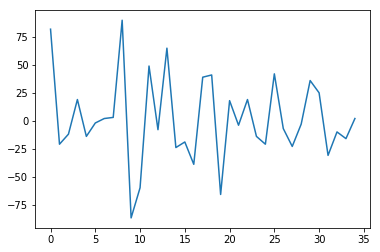

In [61]:
X = linear_data.absenteeism_time_in_hours
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

In [62]:
#As in diff variable the first observation will be NA to calculate the trend as we need two variables to calculate trend, I'm adding a mean of trend as the first observation
#value for trend so that we can use it in linear regression
aver = np.mean(diff)

#Adding this aver value at start
diff.insert(1, aver) 

#Length of trend
len(diff)

36

In [67]:
#Lets make a data frame with trend and month and then forecast the trend
linear_data_trend = pd.DataFrame( {'Month' : range(1,37,1), 'Trend': diff})

#Converting the month to column vector 2D array
Month = linear_data_trend['Month'][:, np.newaxis]
Trend  = linear_data_trend['Trend']

In [69]:
linear_data_trend

,Month,Trend
0,1,82.000000
1,2,1.457143
2,3,-21.000000
3,4,-12.000000
4,5,19.000000
5,6,-14.000000
6,7,-2.000000
7,8,2.000000
8,9,3.000000
9,10,90.000000


In [71]:
#Making the linear regression model
lr = LinearRegression()
#Fitting the model
fit = lr.fit(Month, Trend)

b_0   = fit.intercept_
coeff = fit.coef_

In [73]:
b_0 

7.921632653061224

In [74]:
coeff

array([-0.34943188])

In [75]:
#Making the predicted month
predict_month_trend = np.array(
  [a for a in range(38, 55)]
)[:, np.newaxis]

#Forecasting the trend till December 2011
forecast_trend = lr.predict(predict_month_trend)
forecast_trend

array([ -5.35677882,  -5.7062107 ,  -6.05564258,  -6.40507446,
        -6.75450634,  -7.10393822,  -7.4533701 ,  -7.80280199,
        -8.15223387,  -8.50166575,  -8.85109763,  -9.20052951,
        -9.54996139,  -9.89939327, -10.24882515, -10.59825703,
       -10.94768891])

In [78]:
#Lets make a new Data frame with Month, trend and Absenteese hours
linear_TA = pd.DataFrame({'Month' : range(1,37,1), 'Trend': diff , 'absenteeism_time_in_hours': linear_data.absenteeism_time_in_hours})

In [79]:
linear_TA

,Month,Trend,absenteeism_time_in_hours
0,1,82.000000,3
1,2,1.457143,85
2,3,-21.000000,64
3,4,-12.000000,52
4,5,19.000000,71
5,6,-14.000000,57
6,7,-2.000000,55
7,8,2.000000,57
8,9,3.000000,60
9,10,90.000000,150


In [80]:
#Saving the predictor variables into a new variable 
X = linear_TA.loc[:,['Month','Trend']]
#Splitting into train and test. 80:20
x_train, x_cv, y_train, y_cv = train_test_split(X, linear_TA.absenteeism_time_in_hours, test_size = 0.2)

In [81]:
x_train

,Month,Trend
28,29,-23.0
0,1,82.0
21,22,18.0
5,6,-14.0
34,35,-16.0
24,25,-14.0
27,28,-7.0
22,23,-4.0
14,15,65.0
23,24,19.0


In [82]:
#Training the model
fit_tren = lr.fit(x_train, y_train)

#Predicting the absentese hours for the test feature i.e Month and trend 
pred = lr.predict(x_cv)

In [83]:
pred

array([67.01427   , 44.61529115, 81.91613302, 43.96198826, 49.60292819,
       34.34804737, 10.63719609, 46.83280023])

In [87]:
lr.intercept_

41.484315258777116

In [88]:
len(lr.coef_)

2

In [90]:
lr.coef_

array([0.89780653, 0.46808036])

In [94]:
#Getting the R square score
score = lr.score(x_train, y_train)

In [95]:
score

0.3665378771514537

In [86]:
#Calculating the Root mean square error
lin_mse = mean_squared_error(pred, y_cv)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 68.6820


In [87]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_cv, pred)

45.46511338098518

In [99]:
#AIC Score
regr = OLS(y_train, add_constant(x_train)).fit()

In [100]:
regr.aic

261.27525066824626